### Importi library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [7]:
dataset = pd.read_csv('../input/data.csv')

In [8]:
dataset.head() #mengecek dengan struktur data frame 5 baris teratas 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
dataset.info() #mengecek tipe data dan nilai null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Explore data

Data kami memiliki 18 feature namun tidak semua digunakan.
hanya beberapa feature yang memiliki dominasi tinggi yang akan digunakan

In [12]:
plt.style.use('dark_background')

<AxesSubplot:xlabel='Logprice', ylabel='Density'>

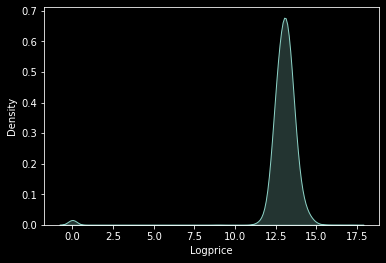

In [13]:
# mengecek persebaran dari kolom target(price)

dataset['Logprice'] = dataset.price.apply(np.log1p)
sns.kdeplot(dataset.Logprice,shade=True)

In [14]:
dataset.drop('Logprice',axis=1,inplace=True)

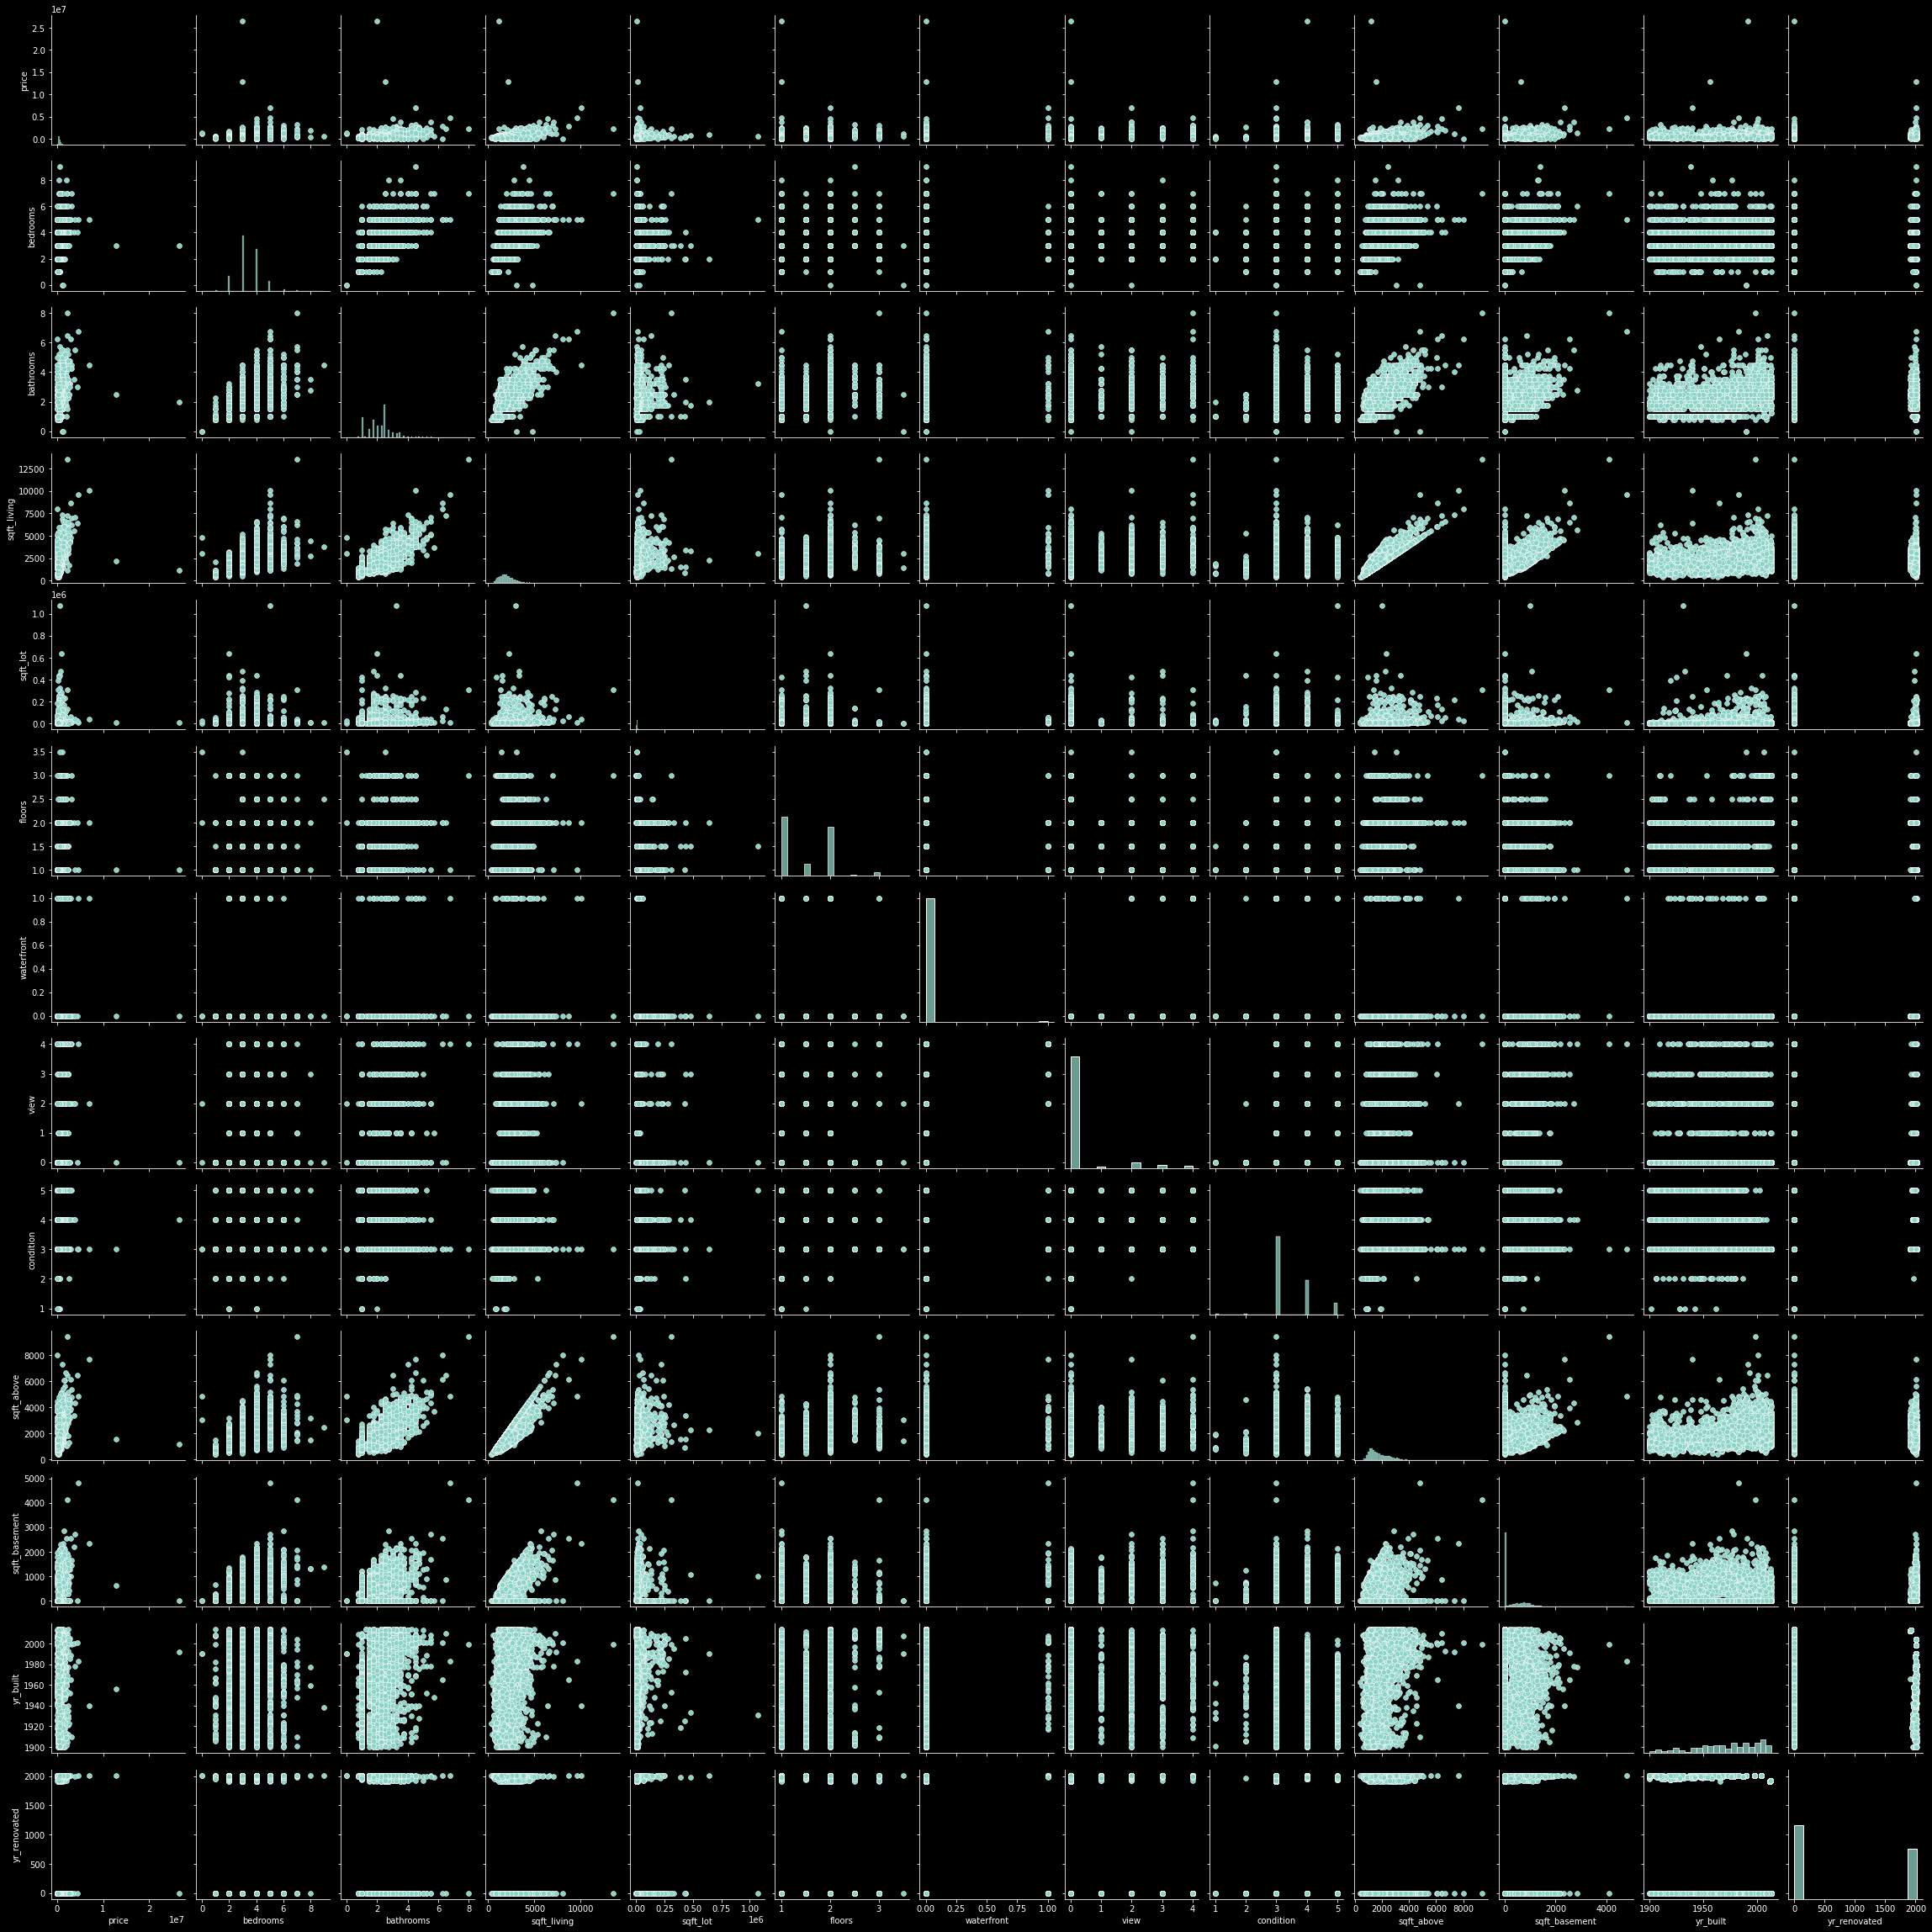

In [15]:
sns.pairplot(dataset)

Di sini, kami tidak melihat linearitas langsung fitur dengan harga Target kami. Meskipun kita dapat melihat bahwa ada outlier. Outlier bisa berupa kesalahan atau hanya varians. Untuk mengatasi outlier, kami memiliki banyak metode yang tersedia. Di sini kita akan menggunakan skor z.

Tapi sebelum itu mari kita hapus fitur yang mewakili hal-hal yang langka atau pengecualian dalam beberapa hal dan tidak akan relevan bagi pembeli rumah.

In [10]:
from sklearn.feature_selection import mutual_info_regression

In [11]:
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [12]:
x = dataset.copy()
y = x.pop('price')

mi_score = make_mi_score(x,y)
mi_score

street           1.149118
statezip         0.457778
city             0.310472
sqft_living      0.298258
sqft_above       0.200071
bathrooms        0.193590
sqft_lot         0.144439
bedrooms         0.076253
yr_built         0.075571
floors           0.071026
view             0.052216
sqft_basement    0.044597
yr_renovated     0.018178
condition        0.006858
waterfront       0.005099
date             0.004385
country          0.000000
Name: Mutual Information Score, dtype: float64

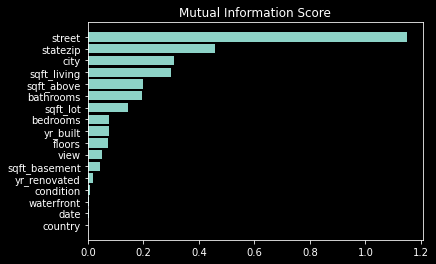

In [13]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(mi_score)

In [14]:
# menyempurnakan dataset berdasarkan mutual information score 
dataset = dataset[['street','statezip','city','sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]

In [15]:
dataset

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,1954,6360,3.0
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,1983,7573,3.0
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,2009,7014,3.0
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,1974,6630,4.0


In [16]:
dataset=dataset.join(y)

### Menghilangkan Outliers dengan Z-score

Saat menghitung skor-z, kami menskalakan ulang dan memusatkan data dan mencari titik data yang terlalu jauh dari nol. Titik-titik data yang terlalu jauh dari nol ini akan dianggap sebagai outlier.

Dalam sebagian besar kasus, ambang batas 3 atau -3 digunakan. Jika nilai Z-score masing-masing lebih besar dari atau kurang dari 3 atau -3, titik data tersebut akan didefinisikan sebagai outlier.

In [17]:
from scipy import stats

z = np.abs(stats.zscore(dataset[['sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]))
print(z)

      sqft_living  sqft_above  bathrooms  yr_built  sqft_lot  bedrooms
0        0.829971    0.565224   0.843204  0.531014  0.193434  0.441122
1        1.568528    1.789559   0.432802  1.674693  0.161718  1.759705
2        0.217367    0.119171   0.205201  0.161000  0.080978  0.441122
3        0.144686    0.959621   0.113800  0.261913  0.190145  0.441122
4        0.206984    0.797222   0.432802  0.175376  0.121306  0.659291
...           ...         ...        ...       ...       ...       ...
4595     0.653458    0.368025   0.524202  0.564651  0.236689  0.441122
4596     0.705374    0.426025   0.432802  0.410840  0.202882  0.441122
4597     0.904009    1.371962   0.432802  1.285418  0.218462  0.441122
4598     0.051238    0.878421   0.205201  0.108101  0.229164  0.659291
4599     0.674224    0.391225   0.432802  0.646303  0.188139  0.441122

[4600 rows x 6 columns]


menentukan ambang batas untuk mengidentifikasi outlier.

In [18]:
threshold = 3
print(np.where(z>3))

(array([  56,  107,  122,  122,  122,  122,  122,  217,  227,  233,  240,
        241,  252,  252,  252,  254,  272,  291,  291,  375,  418,  418,
        452,  461,  462,  462,  462,  462,  471,  479,  484,  495,  548,
        575,  581,  581,  634,  634,  634,  675,  679,  743,  747,  779,
        798,  839,  847,  878,  879,  999, 1017, 1031, 1078, 1089, 1103,
       1128, 1130, 1132, 1132, 1182, 1182, 1209, 1209, 1209, 1261, 1265,
       1272, 1275, 1275, 1301, 1302, 1302, 1360, 1390, 1406, 1408, 1411,
       1417, 1417, 1424, 1455, 1479, 1500, 1539, 1567, 1567, 1571, 1602,
       1637, 1644, 1722, 1762, 1786, 1944, 1952, 1952, 1962, 1962, 2005,
       2005, 2152, 2155, 2157, 2199, 2226, 2279, 2286, 2286, 2300, 2316,
       2328, 2328, 2328, 2365, 2401, 2480, 2551, 2588, 2654, 2654, 2654,
       2717, 2725, 2731, 2731, 2731, 2731, 2761, 2761, 2846, 2846, 2855,
       2872, 2889, 2917, 2967, 2967, 2967, 2968, 2980, 2980, 3004, 3004,
       3004, 3004, 3046, 3056, 3099, 3117, 3122, 3

Array pertama berisi list nomor baris dan array kedua berisi masing-masing nomor kolom, yang memiliki skor Z lebih tinggi dari 3.

Dengan begitu akan dilakukan penghapusan outlier untuk mendapatkan data yang bersih

In [19]:
new_dataset = dataset[(z<3).all(axis=1)]

In [20]:
new_dataset.shape # 273 (4600-4327) outliers dihapus

(4435, 10)

In [21]:
new_dataset.head(2)

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.5,1955,7912,3.0,313000.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.5,1921,9050,5.0,2384000.0


### Training and Testing dataset

In [2]:
x = new_dataset.copy()
y = x.pop('price')

NameError: name 'new_dataset' is not defined

### Target Encoding

Kami melihat dalam skor mutual information kami bahwa street, city and zipcodes memengaruhi harga rumah. Hal tersebut masuk akal juga dari perspektif pembeli juga. Rumah milik daerah perkotaan memiliki harga yang lebih tinggi dibandingkan dengan daerah yang jauh dari kota.

Jadi kita tidak akan mengabaikan feature tersebut. dengan bantuan target encoding, kita akan mengkodekan(encode) fitur-fitur ini.

In [23]:
from category_encoders import MEstimateEncoder

In [24]:
encoder = MEstimateEncoder(cols=['street','statezip','city'],m=0.5)
encoder.fit(x,y)
x_transformed = encoder.transform(x)

In [25]:
x_transformed

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,3.859344e+05,375656.132823,421503.366508,1340,1340,1.50,1955,7912,3.0
1,1.766601e+06,849969.156900,570200.891592,3650,3370,2.50,1921,9050,5.0
2,4.052677e+05,321296.502254,439062.351650,1930,1930,2.00,1966,11947,3.0
3,4.572677e+05,605283.972110,794664.954324,2000,1000,2.25,1963,8030,3.0
4,5.439344e+05,637165.488812,641698.401317,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,3.827122e+05,375656.132823,570200.891592,1510,1510,1.75,1954,6360,3.0
4596,5.334900e+05,628361.946825,794664.954324,1460,1460,2.50,1983,7573,3.0
4597,4.552039e+05,495712.205322,371025.148520,3010,3010,2.50,2009,7014,3.0
4598,3.128677e+05,266618.424972,570200.891592,2090,1070,2.00,1974,6630,4.0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed.values,y.values,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[430000.        , 430269.26997451],
       [700000.        , 699453.01842046],
       [695000.        , 746717.99872996],
       ...,
       [450000.        , 450944.6053285 ],
       [217500.        , 218007.61352195],
       [330000.        , 331767.97961047]])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2952.2238169059888
457706403.5597009
0.9947499075331588


r2_score kami mengatakan bahwa model Linear paling cocok untuk dataset kami

In [34]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regressor,x_train,y_train,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cvs.std()*100))

Accuracy: 99.81 %
Standard Deviation: 0.25 %


Di sini, standar deviasi sangat rendah yang merupakan pertanda baik.

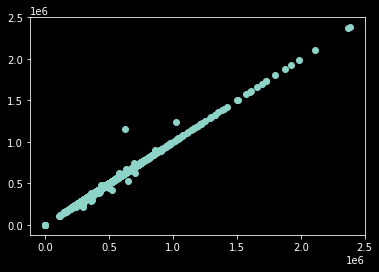

In [35]:
plt.scatter(y_test,y_pred)